# Image Processing SoSe 2024 - Assignment - 01

### Deadline is 25.04.2024 at 12:00 p.m.

#### Students: Vinzent Hannes Jörß, Minh Tuan Nguyen

Please solve the assignments together with a partner.

Make sure the code runs without errors, when clicking `Kernel` -> `Restart Kernel & Run All Cells`. Then save the notebook and upload your submission.

## Introduction to Python / Numpy

* [Learn Python in 15 minutes](https://learnxinyminutes.com/docs/python3/): We will use Python 3.
* [Numpy for Matlab Users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#general-purpose-equivalents)
* [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

## Libraries

We will use the following libraries:

* matplotlib
* numpy
* scipy
* scikit-image
* Pillow


# Exercise 0 - Setup Development Environment - [1 Point]

Install the following dependencies using pip

In [1]:
import sys
!{sys.executable} -m pip install numpy==1.26.4 scipy==1.13.0 scikit-image==0.22.0 matplotlib==3.8.4 Pillow==10.3.0

In [2]:
# display the plots inside the notebook
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

The [skimage](http://scikit-image.org/) library comes with multiple useful test images.  Let's start with an image of an astronaut. 

In [4]:
from skimage.data import astronaut

In [5]:
img = astronaut()   # Get the image
print(img.shape)    # the dimension of the image
print(img.dtype)    # the image type

(512, 512, 3)
uint8


We have a `(512, 512, 3)` array of unsigned bytes. At `img[x, y]` there are three values for R,G and B.

We will always work with floating point arrays between 0 and 1. 

In [6]:
img = img / 255.

Lets display the image.

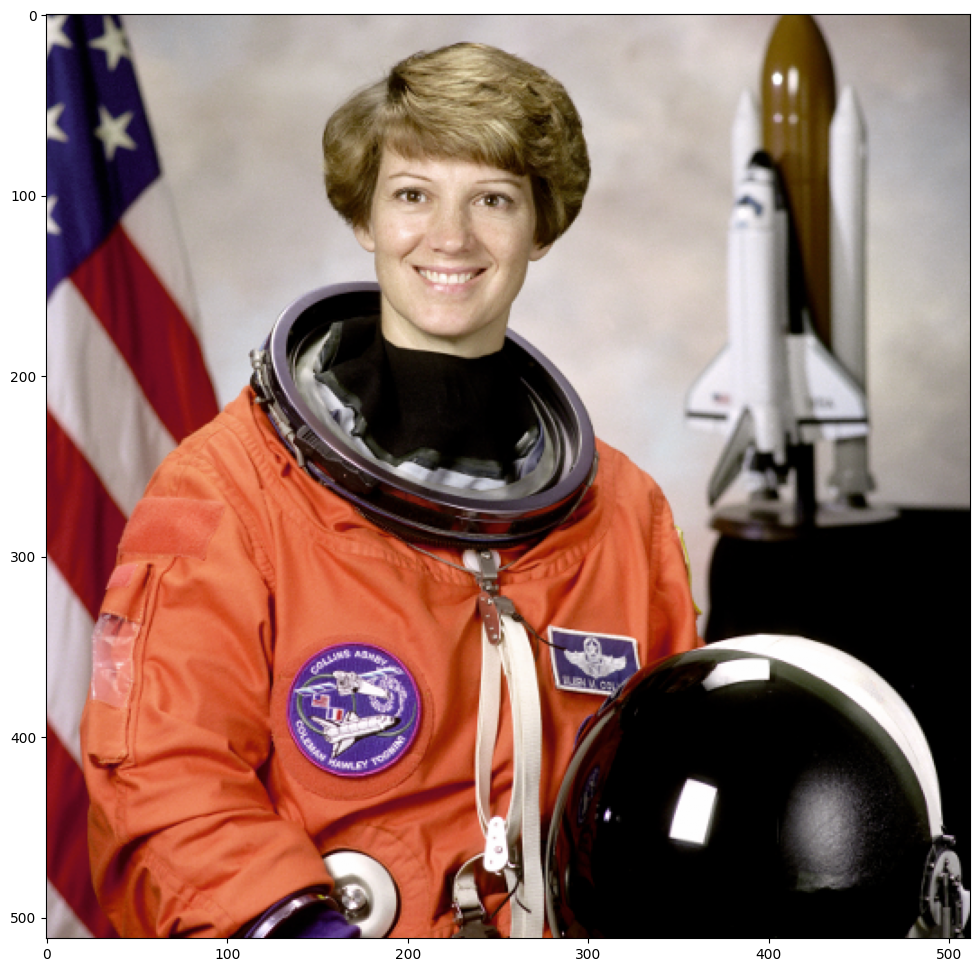

In [7]:
plt.imshow(img)
plt.show()

This is [Eileen Collins](https://en.wikipedia.org/wiki/Eileen_Collins). She was the first astronaut 
 to fly the Space Shuttle through a complete 360-degree pitch maneuver. What an inspiring woman.

## Exercise 1 - Plot -       [3 Points]

Plot the R, G and B channels as grayscale intensity images separately.

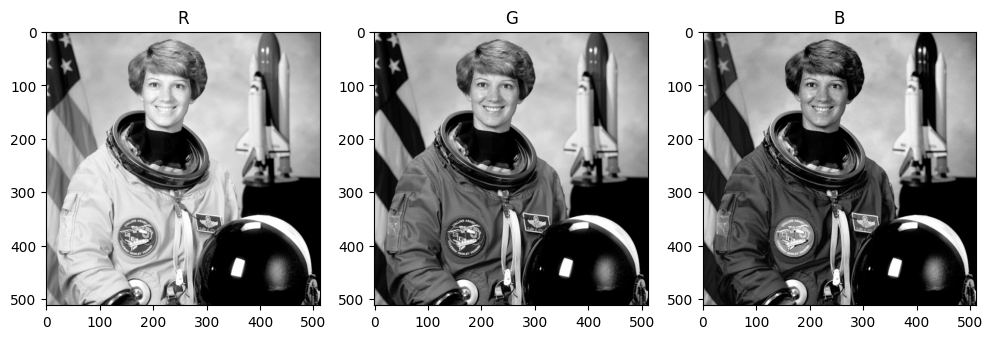

In [8]:
f,a = plt.subplots(1, 3)
a[0].imshow(img[:, :, 0], cmap='gray')
a[1].imshow(img[:, :, 1], cmap='gray')
a[2].imshow(img[:, :, 2], cmap='gray')
a[0].set_title('R')
a[1].set_title('G')
a[2].set_title('B')
plt.show()

## Exercise 2 - XYZ to xy [3 Points]

Implement the `XYZ_to_xy` function where x and y indicate the chromaticity of a color. x shall be calculated as X / (X+Y+Z) and y as Y / (X+Y+Z).


In [11]:
import numpy as np

def XYZ_to_xy(img):
    """
    Converts the numpy array `img` from XYZ to xy.
    """
    XYZ = img.sum(axis=-1, keepdims=True)
    img = img[...,:2] / XYZ
    img[np.isnan(img)] = 1/3  # chromaticity of black point = white point
    return img

Plot the three images: The original image, the chromaticity x component and the chromaticity y component.

D:\msys64\tmp\ipykernel_39356\1181566600.py:6: RuntimeWarning: invalid value encountered in divide
  img = img[...,:2] / XYZ


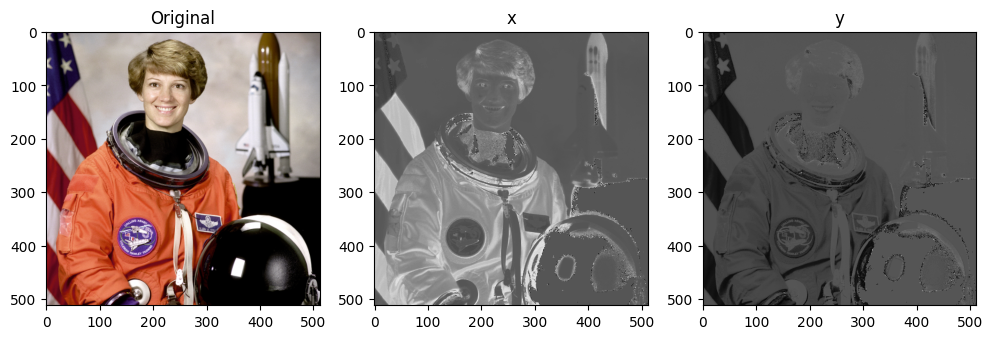

In [12]:
import matplotlib.pyplot as plt
from skimage.data import astronaut

img = astronaut()

img_as_xy = XYZ_to_xy(img)
f,a = plt.subplots(1, 3)
a[0].imshow(img)
a[1].imshow(img_as_xy[:, :, 0], cmap='gray')
a[2].imshow(img_as_xy[:, :, 1], cmap='gray')
a[0].set_title('Original')
a[1].set_title('x')
a[2].set_title('y')
plt.show()

## Exercise 3 - Calculation [3 Points]

In the figure below you can see the [CIE-XYZ](https://de.wikipedia.org/wiki/CIE-Normvalenzsystem) color space.

![](https://upload.wikimedia.org/wikipedia/commons/4/49/CIE-Normfarbtafel.png)

What are the approximate x,y,z values for the following Adobe RGB colors:
* `(0, 0.5, 0.5)`
* `(0.33, 0.33, 0.33)`

A sodium-vapor lamp shines with double the intensity of a mercury-vapor lamp
. The light from the sodium lamp only contains 
the spectral line at `589,00nm` and the light from the mercury lamp only the
spectral line at `435,83 nm`.

What color does a human experience? What are the approximate x,y,z values?


In [16]:
XYZk = np.array([0.5282, 0.5557, 0.6052])
XYZw = np.array([152.07, 160.00, 174.25])
XYZc = 1 / (XYZw - XYZk) * XYZw / XYZw[1]
XYZcinv = (XYZw - XYZk) / XYZw * XYZw[1]

# Converts the numpy array `img` from absolute XYZ to normalized XYZ in Abode.
# img = (img - XYZk) * XYZc

# Converts the numpy array `img` from normalized XYZ in Abode to absolute XYZ.
# img = img * XYZcinv + XYZk

# Adobe RGB to normalized XYZ
AdobeRGB2XYZ = np.array([
    [0.57667, 0.18556, 0.18823],
    [0.29734, 0.62736, 0.07529],
    [0.02703, 0.07069, 0.99134]
])

def AdobeRGB_to_XYZ(img):
    """
    Converts the numpy array `img` from Adobe RGB to absolute XYZ.
    https://en.wikipedia.org/wiki/Adobe_RGB_color_space#Specifications
    """
    img = img @ AdobeRGB2XYZ.T * XYZcinv + XYZk
    return img

# np.set_printoptions(precision=3, floatmode='fixed')
with np.printoptions(formatter={'float': '{:6.4f}'.format}):
    for rgb in [
        [[[0,    0.5,  0.5]]],
        [[[0.33, 0.33, 0.33]]]
    ]:
        c = np.array(rgb, dtype=float)
        c_as_XYZ = AdobeRGB_to_XYZ(c)
        c_as_xy = XYZ_to_xy(c_as_XYZ)
        x,y = c_as_xy[0,0]
        print(f"Adobe RGB {c[0,0]} corresponds to chromaticity xyz {np.array([x,y,1-x-y])}")

Adobe RGB [0.0000 0.5000 0.5000] corresponds to chromaticity xyz [0.1761 0.3286 0.4953]
Adobe RGB [0.3300 0.3300 0.3300] corresponds to chromaticity xyz [0.3127 0.3290 0.3583]


In [17]:
import urllib.request

response = urllib.request.urlopen('https://scipython.com/static/media/blog/colours/cie-cmf.txt')
f = response.read().decode('utf-8').split('\n')

# Load the CIE colour matching functions for 380-780 nm (5 nm intervals)
wavelengths = np.loadtxt(f, usecols=(0,))
cmf = np.loadtxt(f, usecols=(1,2,3))[:-1]  # 780 nm invisible

def wavelength_to_XYZ(wavelength):
    """
    Returns the chromaticity xy for the given `wavelength`.
    """
    i = int((wavelength - 380) / 5)
    j = (wavelength - 380) / 5 - i
    return cmf[i] * (1-j) + cmf[i+1] * j

In [18]:
sodium_lamp = wavelength_to_XYZ(589.00)
mercury_lamp = wavelength_to_XYZ(435.83)
mix = sodium_lamp * 2 + mercury_lamp

cmfxy = XYZ_to_xy(cmf)
cmfxy = np.concatenate([cmfxy[:(700-380) // 5], cmfxy[0:1]])  # close the loop at 700 nm
whitepoint = np.array([1/3, 1/3])
sodiumxy = XYZ_to_xy(sodium_lamp)
mercuryxy = XYZ_to_xy(mercury_lamp)
mixxy = XYZ_to_xy(mix)

with np.printoptions(formatter={'float': '{:5.3f}'.format}):
    print(f"Approximate chromaticity of the mixed light: {np.append(mixxy, 1-mixxy.sum())}")

Approximate chromaticity of the mixed light: [0.425 0.279 0.296]


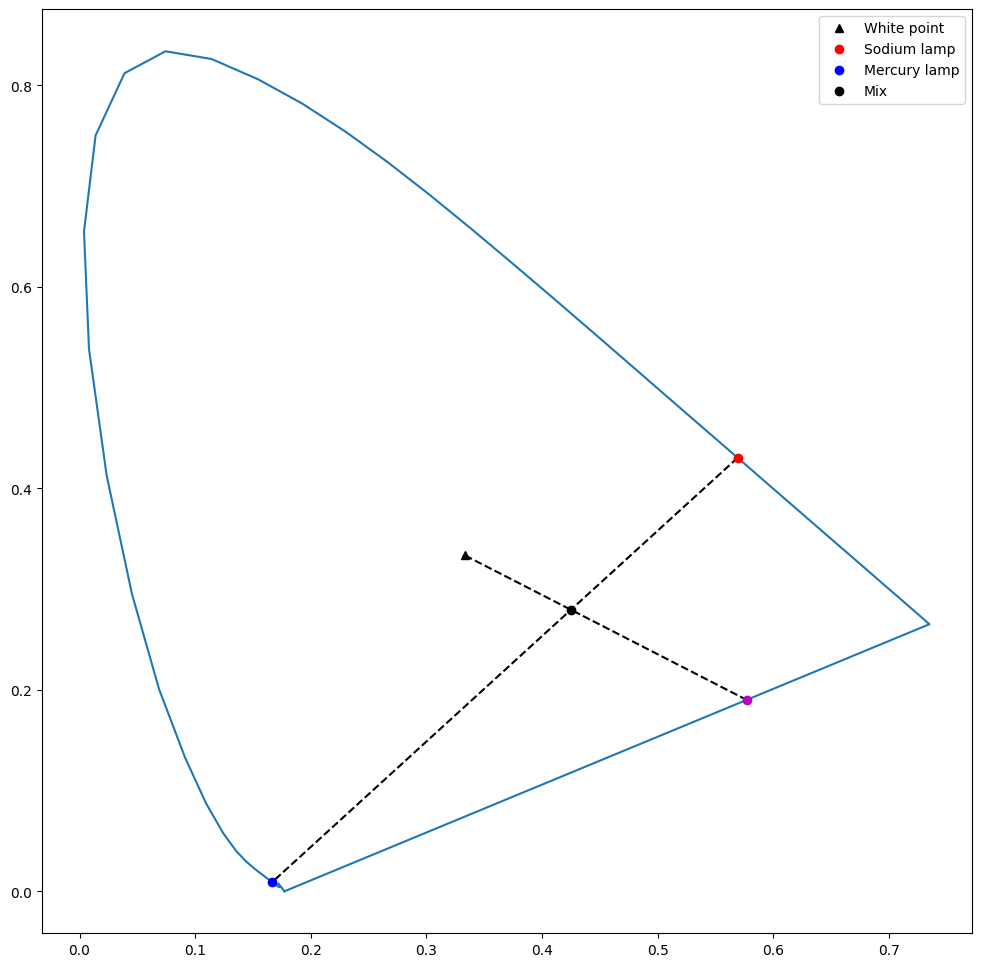

In [19]:
# Point intersection between white point - mix point line and the line of purples
# whitepoint + (mixxy - whitepoint) * t = cmfxy[-2] + (cmfxy[-1] - cmfxy[-2]) * s
# (mixxy - whitepoint) * t + (cmfxy[-2] - cmfxy[-1]) * s = cmfxy[-2] - whitepoint
A = np.array([mixxy - whitepoint, cmfxy[-2] - cmfxy[-1]]).T
t, s = np.linalg.solve(A, cmfxy[-2] - whitepoint)
perceptual_mix = whitepoint * (1-t) + mixxy * t

plt.plot(cmfxy[:,0], cmfxy[:,1])
plt.plot(*np.array([sodiumxy, mercuryxy]).T, 'k--')
plt.plot(*np.array([whitepoint, perceptual_mix]).T, 'k--')
plt.plot(*whitepoint, 'k^', label='White point')
plt.plot(*sodiumxy, 'ro', label='Sodium lamp')
plt.plot(*mercuryxy, 'bo', label='Mercury lamp')
plt.plot(*mixxy, 'ko', label='Mix')
plt.plot(*perceptual_mix, 'mo')
plt.legend()
plt.show()

The perceived color is the magenta and lies in the direction of the line of purples.